# ***To build a churn prediction model***

# **Introduction**

<!-- Author Section -->
<h1 style="font-family: 'Poppins', sans-serif; font-weight: bold; color: green;">
  👨‍💻 Author: Taskeen Hussain
</h1>

<!-- Social Media Badges -->
<p>
  <a href="https://github.com/TaskeenHussain" target="_blank">
    <img src="https://img.shields.io/badge/GitHub-Profile-181717?style=for-the-badge&logo=github&logoColor=white" alt="GitHub Badge">
  </a>

  <a href="https://www.kaggle.com/taskeenhkbbeechtree" target="_blank">
    <img src="https://img.shields.io/badge/Kaggle-Profile-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white" alt="Kaggle Badge">
  </a>

  <a href="mailto:taskeenuaf@gmail.com">
    <img src="https://img.shields.io/badge/Email-Contact-red?style=for-the-badge&logo=gmail&logoColor=white" alt="Email Badge">
  </a>
</p>


# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import sklearn
import xgboost
import lightgbm
import sklearn.metrics
import sklearn.metrics

# **Create dataset**

## ✅ Step-by-Step: Creating telecom_churn_mock_data.csv

In [ ]:
# Calculate TotalCharges with noise
df_customers['TotalCharges'] = (df_customers['Tenure'] * df_customers['MonthlyCharges'] * np.random.uniform(0.95, 1.05, num_customers)).round(2)
df_customers.loc[df_customers['Tenure'] == 1, 'TotalCharges'] = df_customers['MonthlyCharges']

# Identify indices where Tenure is less than 3
low_tenure_indices = df_customers[df_customers['Tenure'] < 3].index

# Select a random sample of these indices
# Ensure the sample size does not exceed the number of available indices
sample_size = min(int(num_customers * 0.01), len(low_tenure_indices))
random_low_tenure_indices = np.random.choice(low_tenure_indices, size=sample_size, replace=False)

# Set TotalCharges to NaN for the selected indices
df_customers.loc[random_low_tenure_indices, 'TotalCharges'] = np.nan

# Churn simulation
churn_probability = (
    0.1 +
    0.15 * (df_customers['Contract'] == 'Month-to-month') +
    0.1 * (df_customers['InternetService'] == 'Fiber optic') +
    0.001 * (df_customers['MonthlyCharges'] - 65) -
    0.002 * (df_customers['Tenure'] - 36) +
    0.1 * (df_customers['OnlineSecurity'] == 'No') +
    0.1 * (df_customers['TechSupport'] == 'No')
)
churn_probability = np.clip(churn_probability, 0.01, 0.99)
#df_customers['Churn'] = np.random.binomial(1, churn_probability, num_customers).astype(str).replace({'1': 'Yes', '0': 'No'})

# Step 1: Generate churn as integers (0 or 1)
df_customers['Churn'] = np.random.binomial(1, churn_probability, num_customers)

# Step 2: Replace 1 with "Yes" and 0 with "No"
df_customers['Churn'] = df_customers['Churn'].replace({1: 'Yes', 0: 'No'})



# Replace inconsistent service values
for col in ['MultipleLines']:
    df_customers[col] = df_customers.apply(lambda row: 'No' if row['PhoneService'] == 'No' else row[col], axis=1)

for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    df_customers[col] = df_customers.apply(lambda row: 'No' if row['InternetService'] == 'No' else row[col], axis=1)

# ✅ Save to CSV
df_customers.to_csv('telecom_churn_mock_data.csv', index=False)
print("✅ File saved as: telecom_churn_mock_data.csv")

✅ File saved as: telecom_churn_mock_data.csv


# **Load Dataset**

🔹 Step 2: Load the ***dataset***

In [ ]:
df_customers.to_csv('telecom_churn_mock_data.csv', index=False)

### Upload the CSV file to your Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Load the dataset

In [ ]:
import pandas as pd

file_path = '/content/telecom_churn_mock_data.csv'
#file_path = '/content/drive/MyDrive/path_to_your_file/telecom_churn_mock_data.csv'
df = pd.read_csv(file_path)
df.head()


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST1000,Male,0,No,No,57,No,No,No,No,...,No,No,No,No,Two year,Yes,Credit card (automatic),92.91,5519.86,No
1,CUST1001,Female,0,No,No,27,Yes,Yes,DSL,No,...,Yes,Yes,No,No internet service,Month-to-month,Yes,Credit card (automatic),42.80,1169.62,Yes
2,CUST1002,Male,1,Yes,No,5,Yes,No,Fiber optic,No,...,No,No,No internet service,No,One year,No,Mailed check,45.31,223.97,Yes
3,CUST1003,Male,0,No,No,71,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Mailed check,43.65,2947.55,No
4,CUST1004,Male,0,No,No,57,Yes,Yes,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),23.84,1425.42,No


# **Distribution of Churn**



### 🔹 Step : Check the distribution of Churn (value counts)

In [ ]:
# Count and percentage
print(df['Churn'].value_counts())
print("\nProportion of Churn:")
print(df['Churn'].value_counts(normalize=True))


Churn
No     1380
Yes     620
Name: count, dtype: int64

Proportion of Churn:
Churn
No     0.69
Yes    0.31
Name: proportion, dtype: float64


### 🔹 Step 4: Plot the distribution of Churn

<ipython-input-17-5f72ae94652d>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, count + 20, f'{churn_counts[i]:.1f}%', ha='center')
<ipython-input-17-5f72ae94652d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='pastel')


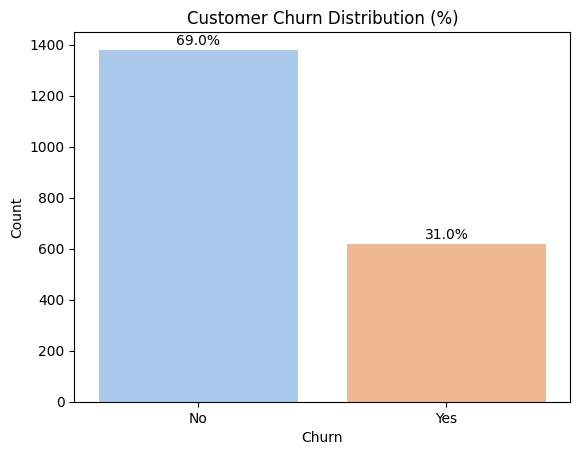

In [ ]:
churn_counts = df['Churn'].value_counts(normalize=True) * 100
for i, count in enumerate(df['Churn'].value_counts()):
    plt.text(i, count + 20, f'{churn_counts[i]:.1f}%', ha='center')

sns.countplot(x='Churn', data=df, palette='pastel')
plt.title("Customer Churn Distribution (%)")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


## Visualize distributions & correlations

### Step 1: View Basic Info
See data types, nulls, and shape.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        2000 non-null   object 
 1   Gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   Tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


### Step 2: Target Distribution – Churn
Count and percentage of churned vs. non-churned customers.

Churn
No     1380
Yes     620
Name: count, dtype: int64
Churn
No     0.69
Yes    0.31
Name: proportion, dtype: float64


<ipython-input-20-5300ab7bfa53>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='pastel')


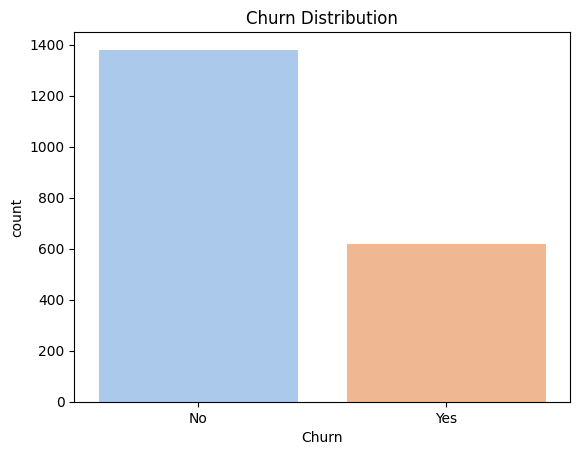

In [ ]:
# Count
print(df['Churn'].value_counts())

# Percentage
print(df['Churn'].value_counts(normalize=True))

# Bar plot
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title("Churn Distribution")
plt.show()

## 📌 Explanation:
Shows how imbalanced the classes are. If too imbalanced, you might need resampling later.

### Step 3: Numerical Feature Distributions
Visualize how numeric features like MonthlyCharges, TotalCharges, and Tenure are distributed.

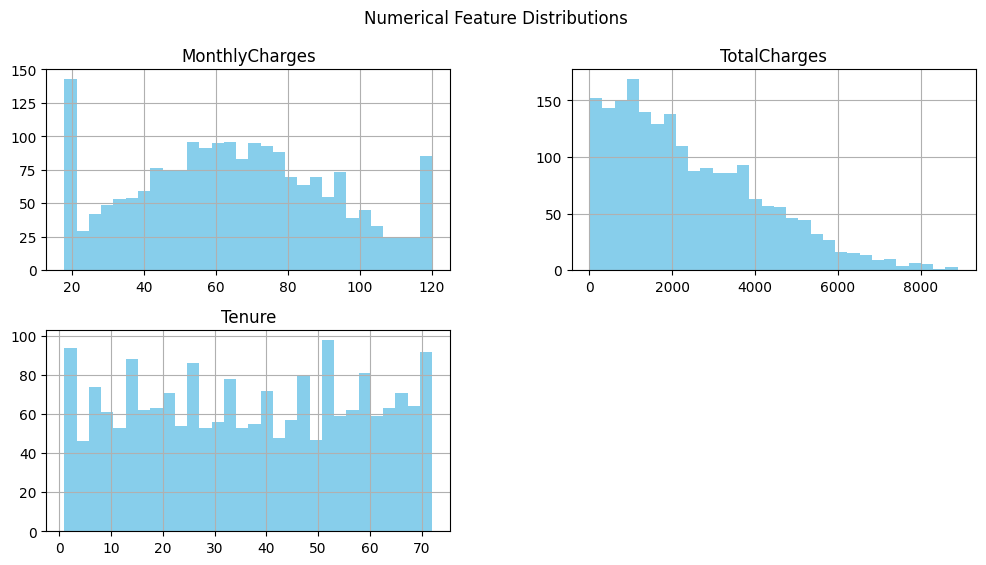

In [ ]:
# Histogram for numerical columns
num_cols = ['MonthlyCharges', 'TotalCharges', 'Tenure']
df[num_cols].hist(bins=30, figsize=(12, 6), color='skyblue')
plt.suptitle("Numerical Feature Distributions")
plt.show()

## 📌 Explanation:
Helps detect:

Skewness

Outliers

Common value ranges


### Step 4: Categorical Feature Distributions
Use countplots for selected categorical features.

<ipython-input-22-3ec007cc927a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-22-3ec007cc927a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-22-3ec007cc927a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-22-3ec007cc927a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

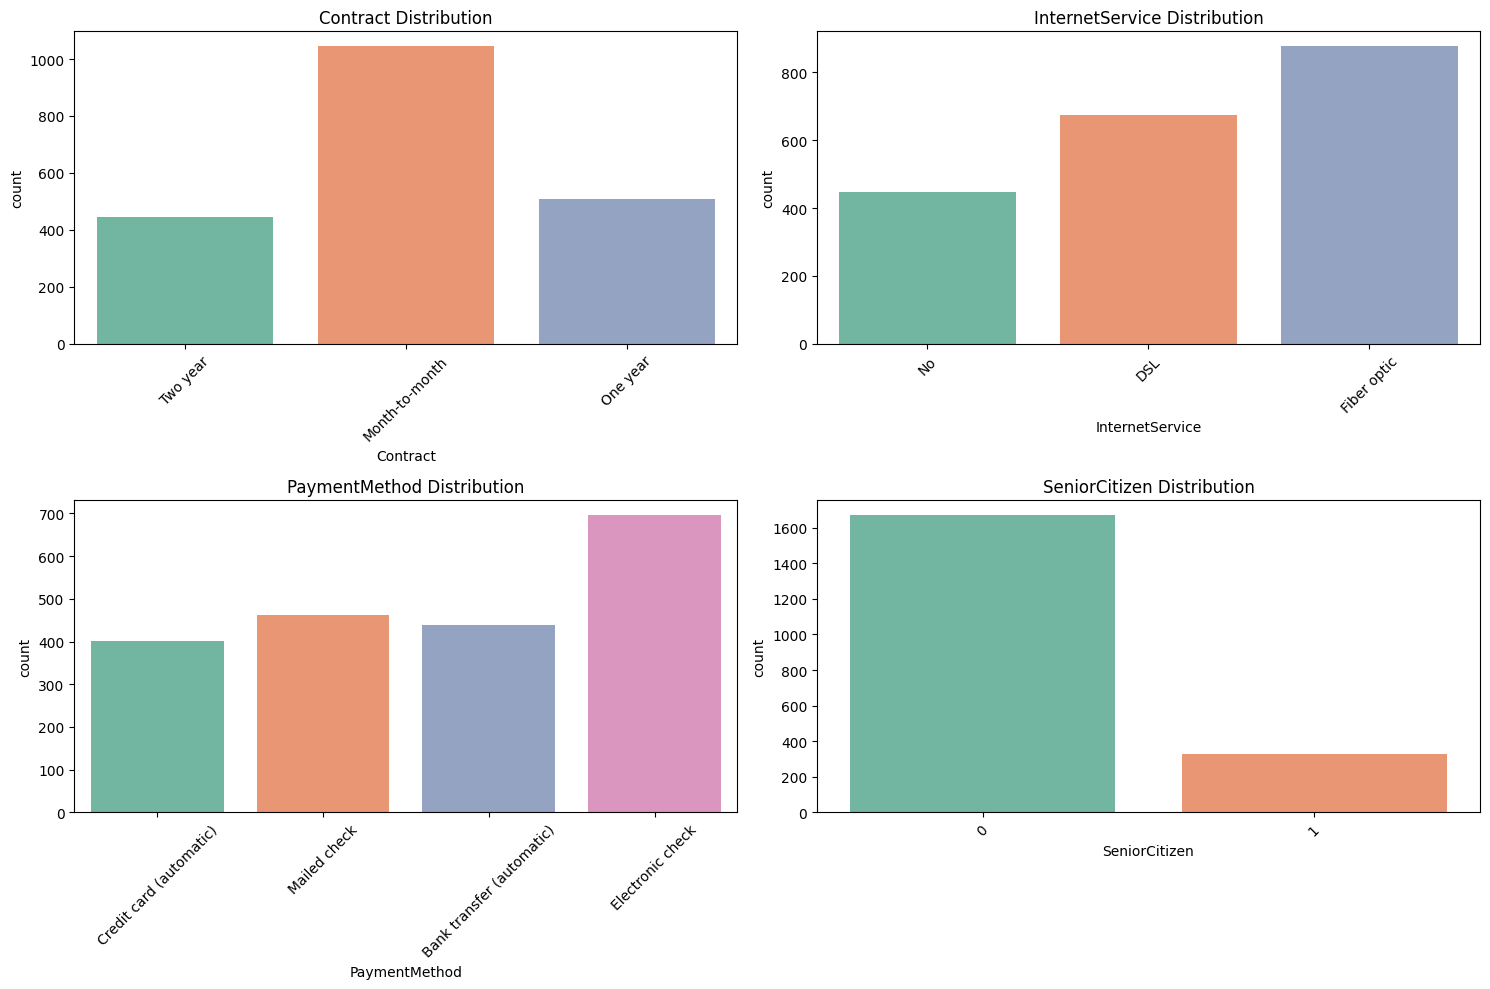

In [ ]:
cat_cols = ['Contract', 'InternetService', 'PaymentMethod', 'SeniorCitizen']

plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

## 📌 Explanation:
You see how many customers fall into each category (e.g., Month-to-month vs. Two year).

### Step 5: **Visualize Feature vs. Churn**
Check how features relate to Churn (target). Example:

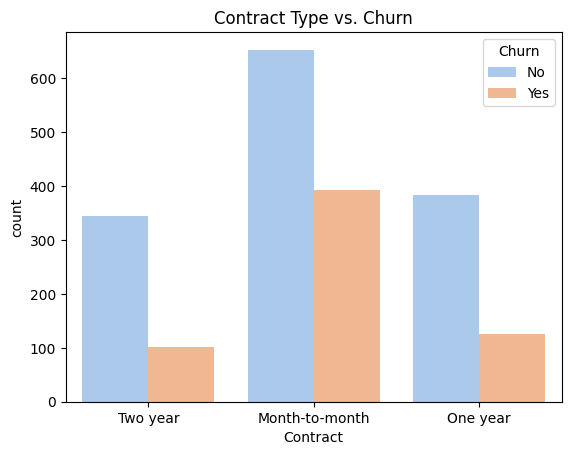

In [ ]:
# Contract type vs Churn
sns.countplot(x='Contract', hue='Churn', data=df, palette='pastel')
plt.title("Contract Type vs. Churn")
plt.show()

📌 Explanation:
You can spot trends (e.g., customers on month-to-month plans are more likely to churn).

Repeat this for other features like:

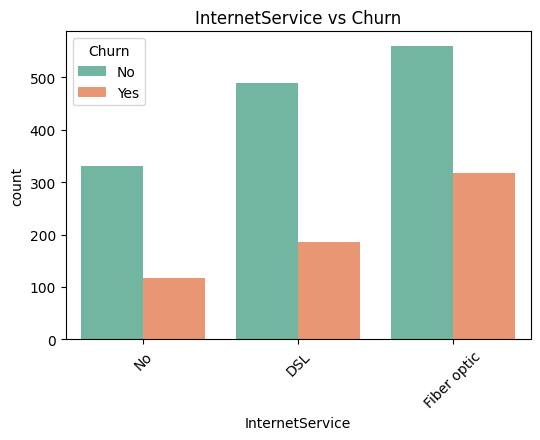

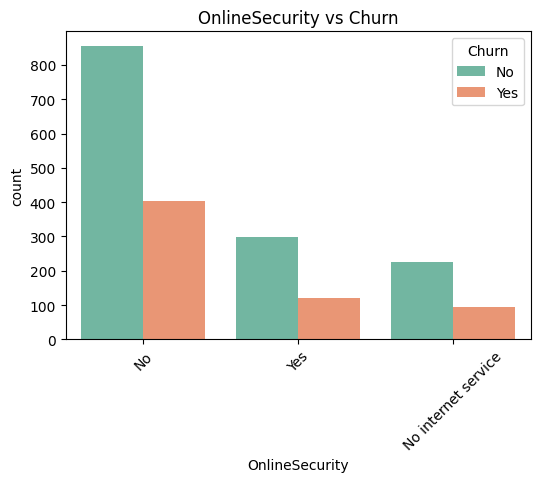

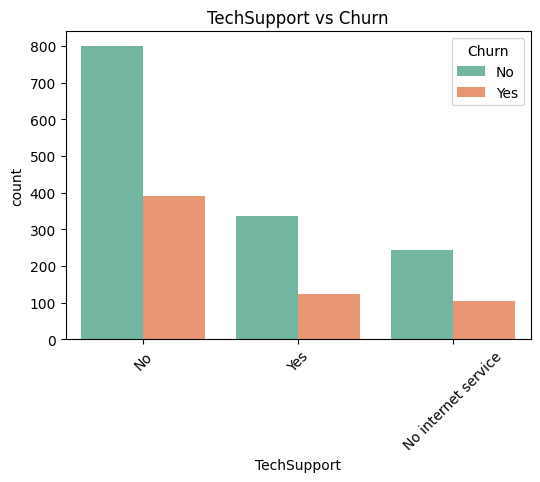

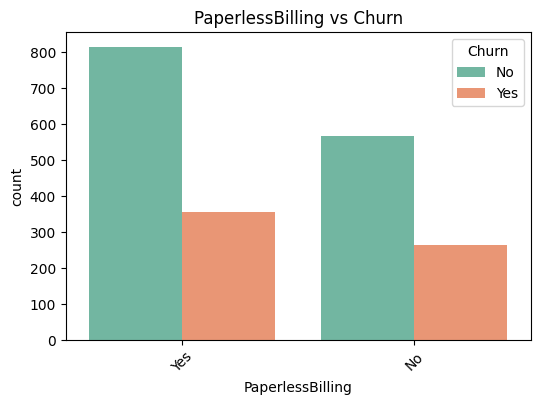

In [ ]:
features = ['InternetService', 'OnlineSecurity', 'TechSupport', 'PaperlessBilling']

for col in features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=df, palette='Set2')
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()

### Step 6: Correlation Heatmap (Numerical)
Shows correlations between numeric features.

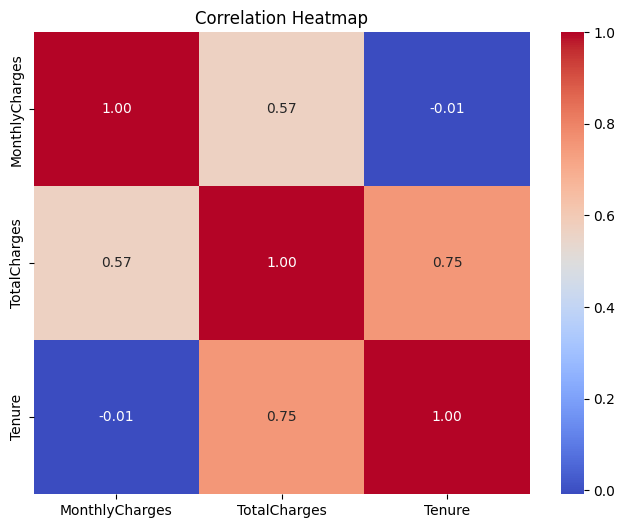

In [ ]:
# Only for numerical columns
plt.figure(figsize=(8, 6))
corr = df[['MonthlyCharges', 'TotalCharges', 'Tenure']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

High correlation (close to ±1) means strong linear relationship. E.g., Tenure and TotalCharges may be positively correlated.

# ✅ Summary
| Task            | Code                       | Purpose                            |
| --------------- | -------------------------- | ---------------------------------- |
| Missing Values  | `df.isnull().sum()`        | Count missing values per column    |
| Missing Heatmap | `sns.heatmap(df.isnull())` | Visualize where data is missing    |
| Boxplot         | `sns.boxplot()`            | Spot outliers in numeric features  |
| Z-Score         | `stats.zscore()`           | Programmatically identify outliers |


# **Identify missing values and outliers**

### ✅ 1. Identify Missing Values

In [ ]:
# Show number of missing values in each column
print(df.isnull().sum())

# Show only columns with missing values
print(df.isnull().sum()[df.isnull().sum() > 0])

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        20
Churn                0
dtype: int64
TotalCharges    20
dtype: int64


🔍 # Explanation:

df.isnull() returns a DataFrame with True for missing cells.

.sum() on this returns the count of True values per column (i.e., number of missing values).

You can filter only the columns that have missing data with [ > 0 ].

This helps you decide:

Which columns have missing values

How many missing values are in each

👉  You can impute missing values using .fillna() or remove rows using .dropna() based on how critical the feature is.



## ✅ 2. Visualize Missing Values

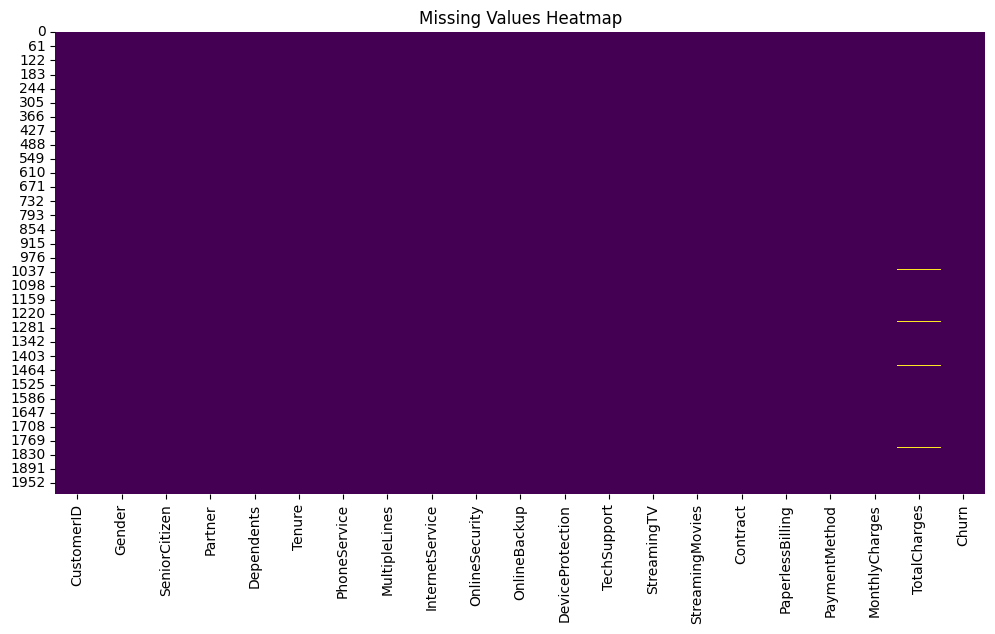

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

🔍 Explanation:

This shows where missing values are in the dataset.

Yellow (or bright) spots indicate missing cells.

Useful when you want a visual overview of missing data patterns.



### ✅ 3. Identify Outliers (Numerical Columns using boxplot)

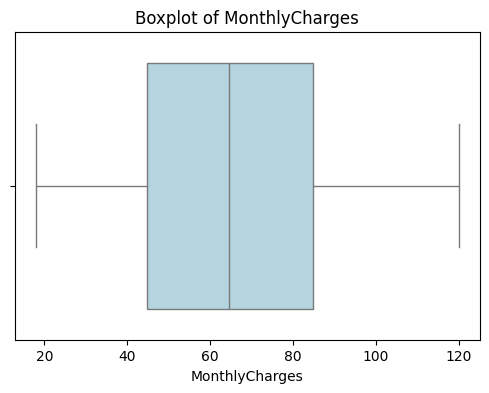

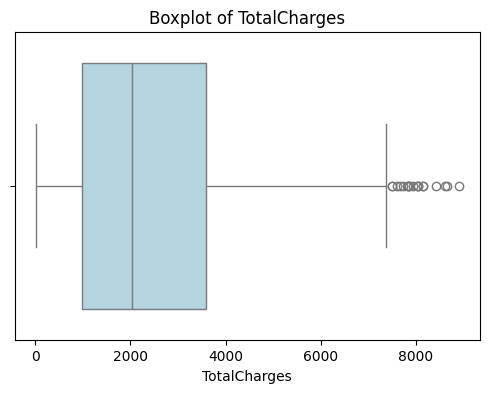

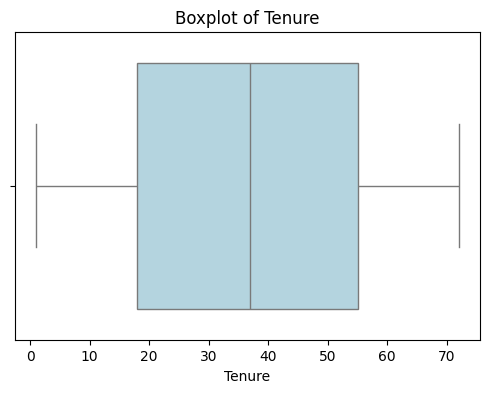

In [ ]:
num_cols = ['MonthlyCharges', 'TotalCharges', 'Tenure']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.show()

🔍 Explanation:

Boxplots show you the distribution of numerical values and highlight outliers.

Any points outside the whiskers (usually 1.5× IQR from Q1 or Q3) are considered outliers.

This is a quick and visual way to detect unusual or extreme values.



# ✅ 4.  Detect Outliers with Z-Score

In [ ]:
from scipy import stats

# Example: Detect outliers in MonthlyCharges
z_scores = np.abs(stats.zscore(df['MonthlyCharges']))
outliers = df[z_scores > 3]
print(outliers[['CustomerID', 'MonthlyCharges']])

Empty DataFrame
Columns: [CustomerID, MonthlyCharges]
Index: []


🔍 Explanation:

Z-score tells you how far a value is from the mean in terms of standard deviations.

A Z-score > 3 (or < -3) is typically flagged as an outlier.



## Summary

| Task            | Code                       | Purpose                            |
| --------------- | -------------------------- | ---------------------------------- |
| Missing Values  | `df.isnull().sum()`        | Count missing values per column    |
| Missing Heatmap | `sns.heatmap(df.isnull())` | Visualize where data is missing    |
| Boxplot         | `sns.boxplot()`            | Spot outliers in numeric features  |
| Z-Score         | `stats.zscore()`           | Programmatically identify outliers |


# ✅ Dataset Assumption
Assume you already have a DataFrame named df and a target column named Churn with values "Yes" or "No".

🧠 Types of Features

Numerical Features: MonthlyCharges, TotalCharges, Tenure

Categorical Features: Gender, Contract, PaymentMethod, etc.

Target: Churn (Yes/No)


## 🔹 1. Relationship: Numerical Features vs. Churn

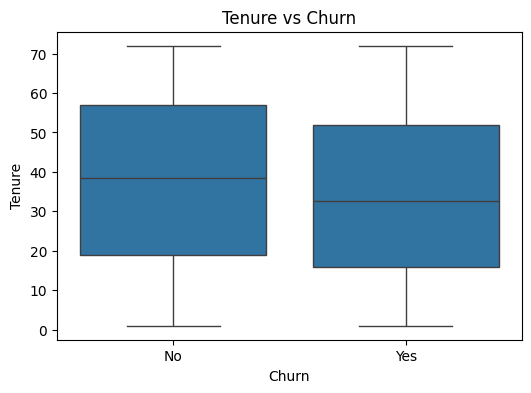

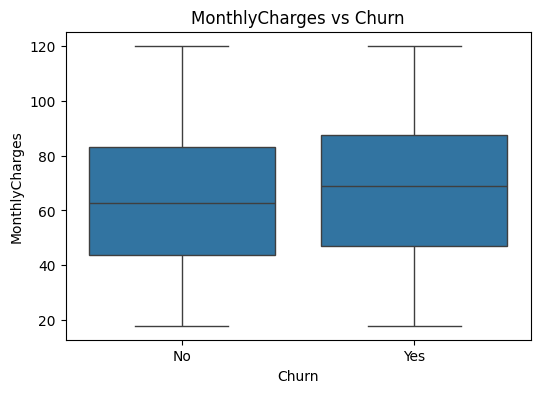

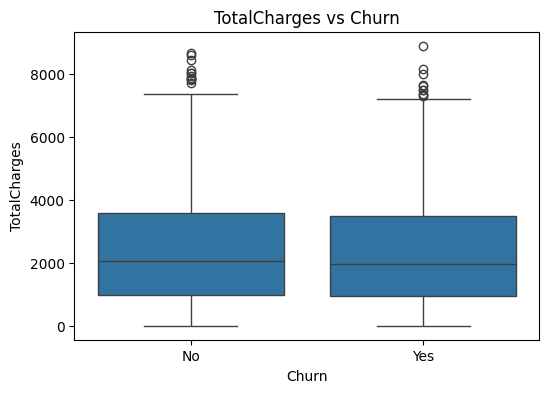

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_features = ['Tenure', 'MonthlyCharges', 'TotalCharges']

for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} vs Churn')
    plt.show()

### ✅ Explanation:
This shows how distributions of numerical values differ between customers who churn and those who don’t.

For example:

Low Tenure values might be more common among churners.

Higher MonthlyCharges could be linked to more churn.



### 🔹 2. Relationship: Categorical Features vs. Churn

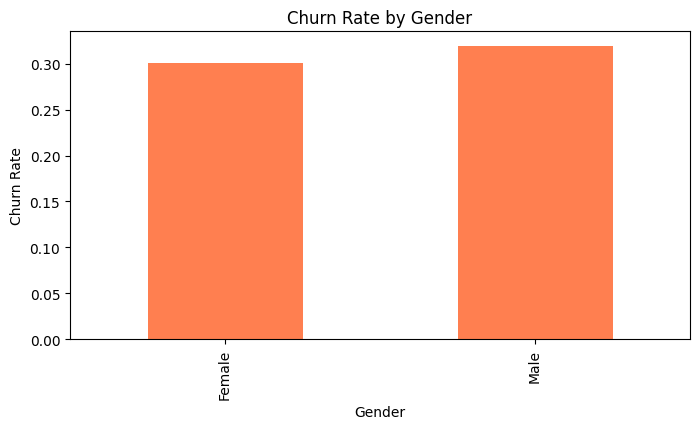

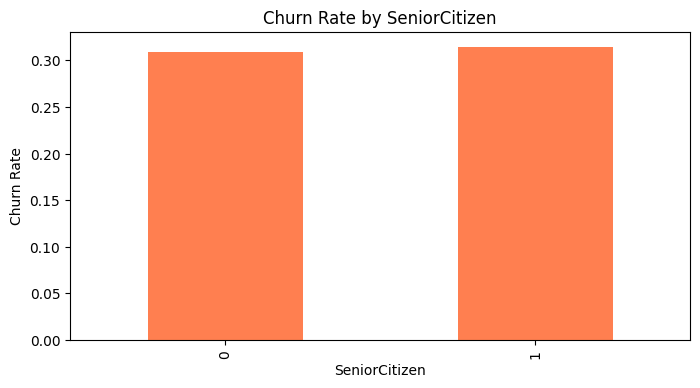

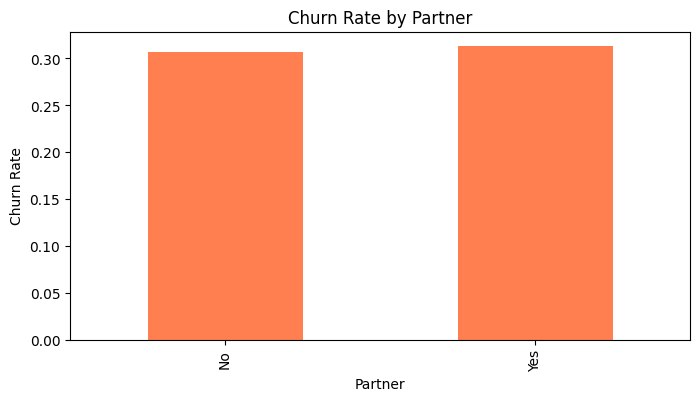

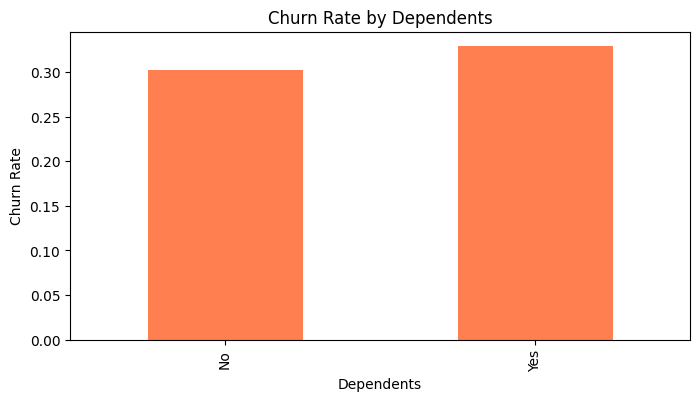

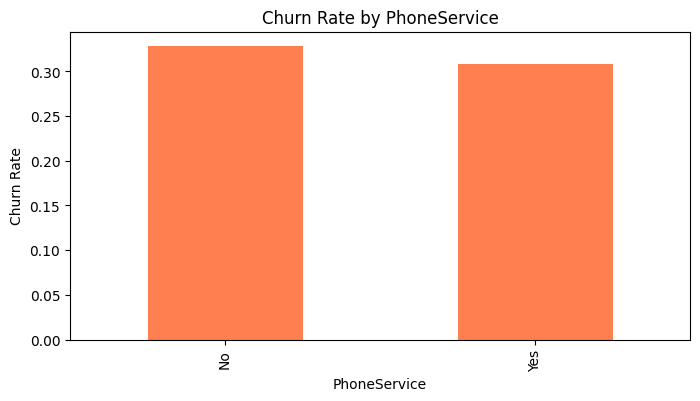

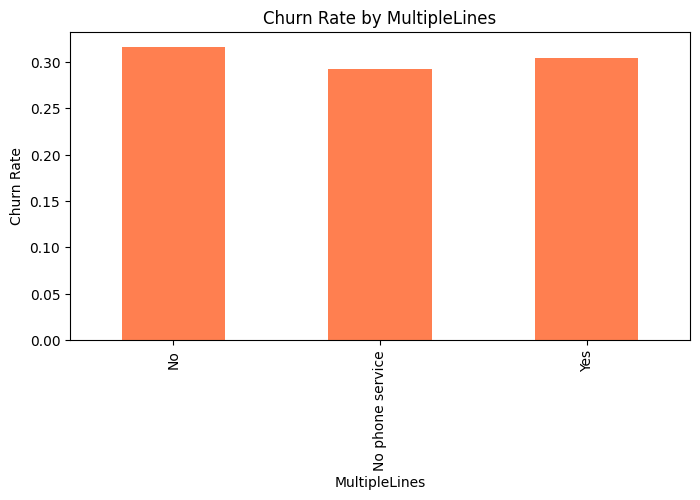

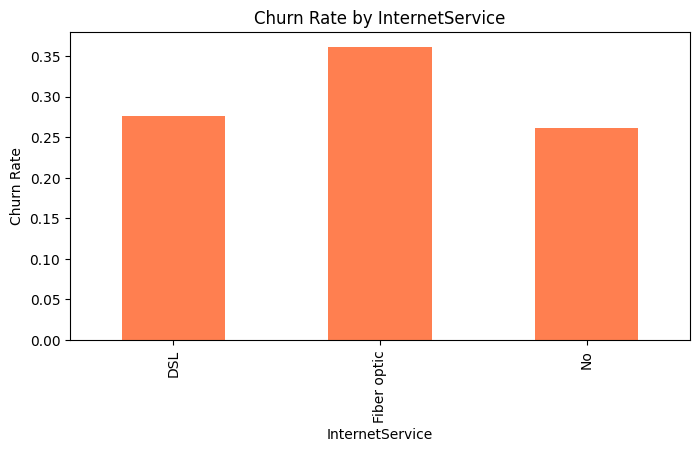

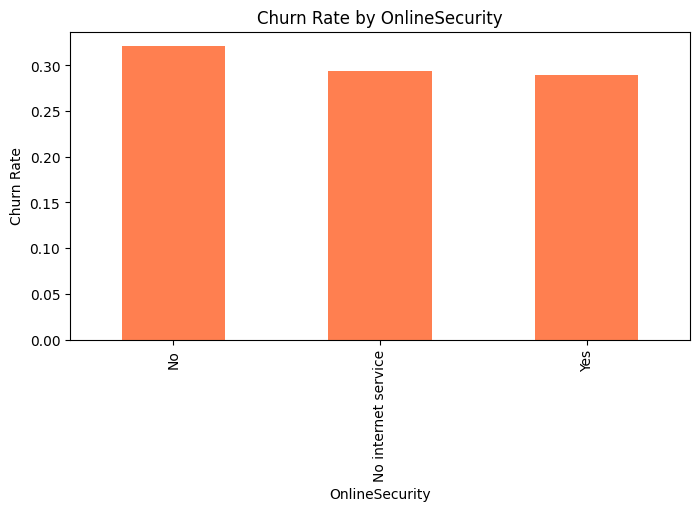

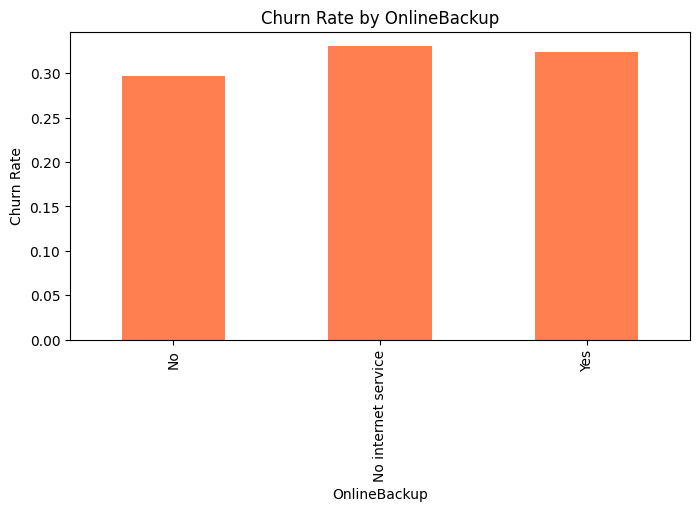

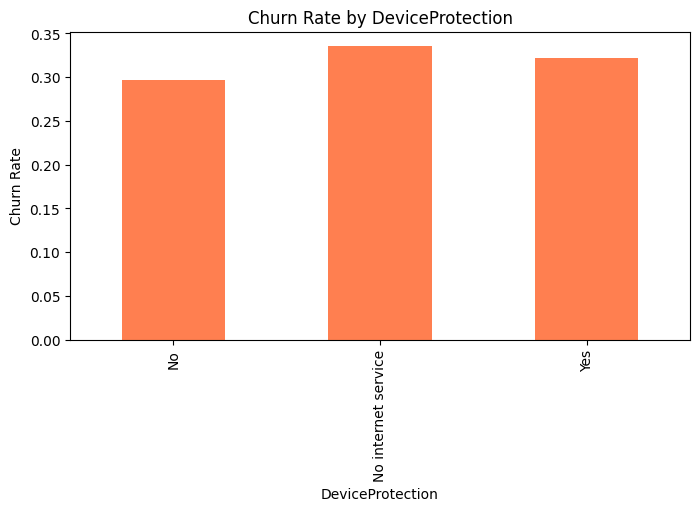

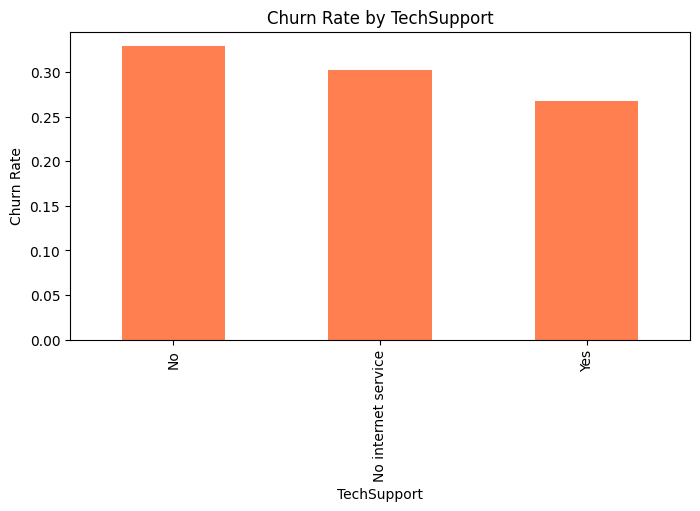

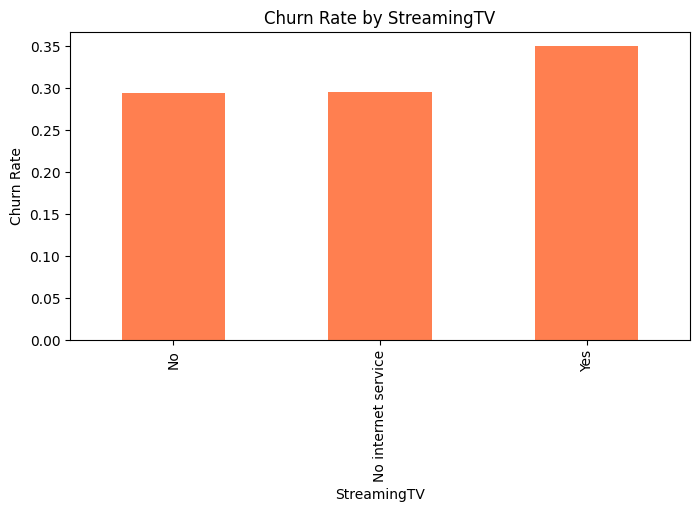

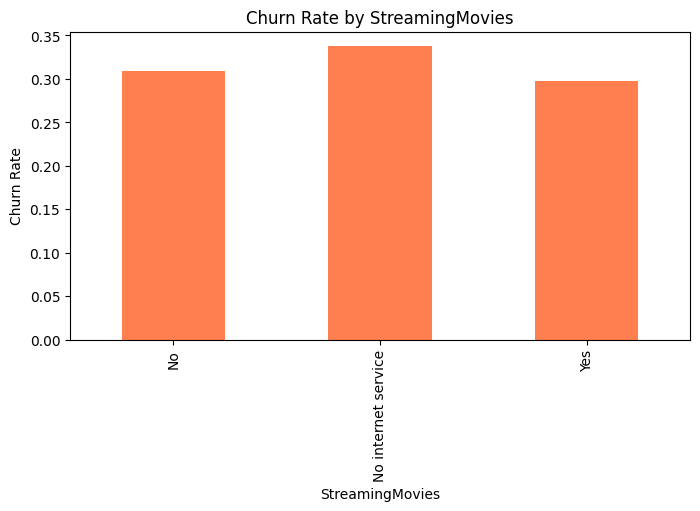

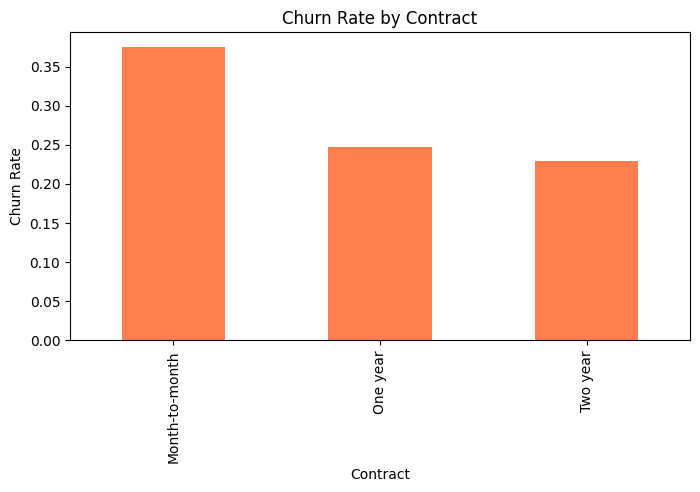

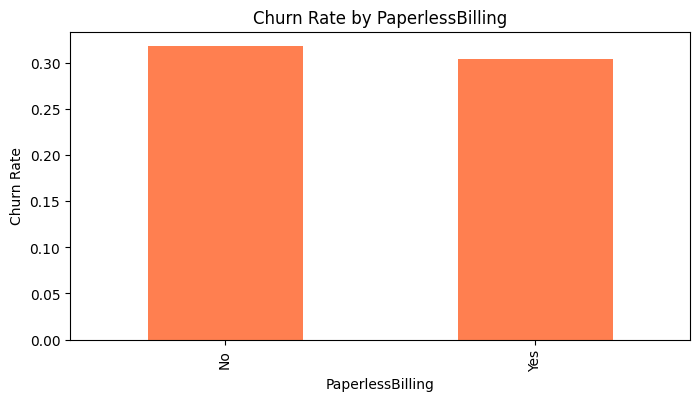

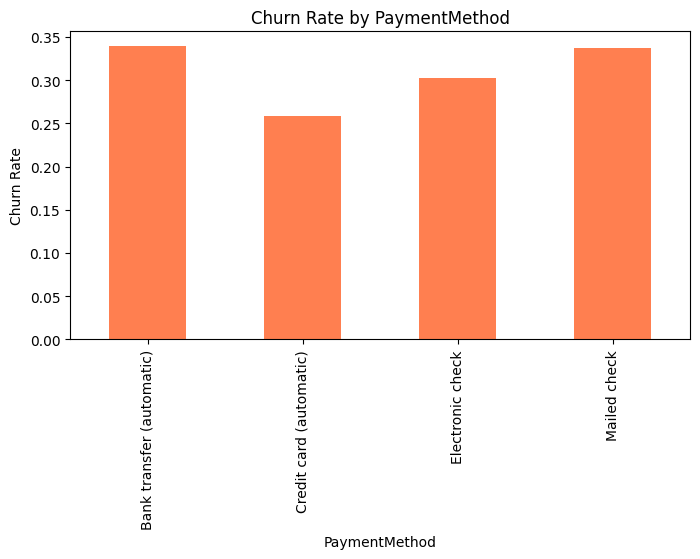

In [ ]:
cat_features = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents',
                'PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaperlessBilling', 'PaymentMethod']

for feature in cat_features:
    plt.figure(figsize=(8, 4))
    churn_rate = df.groupby(feature)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    churn_rate['Yes'].plot(kind='bar', color='coral')
    plt.title(f'Churn Rate by {feature}')
    plt.ylabel('Churn Rate')
    plt.show()

## ✅ Explanation:
This shows churn rate for each category level.

Example interpretations:

Customers on month-to-month contracts may churn more than those with 1- or 2-year contracts.

Customers without online security or tech support may churn more often.


### 🔹 3. Correlation Matrix (Numerical Only)

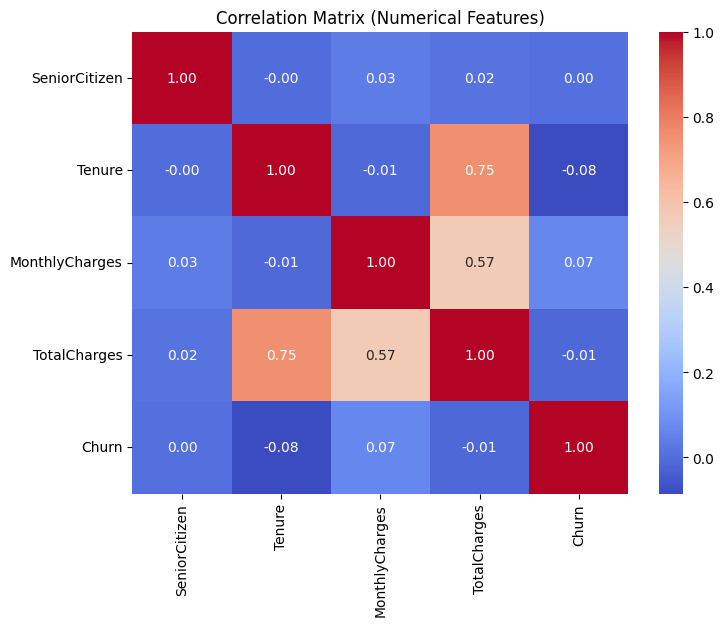

In [ ]:
# Make a copy of the DataFrame and convert 'Churn' to 1/0
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

# Drop non-numeric columns
df_numeric = df_corr.select_dtypes(include=['int64', 'float64'])

# Plot the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


### ✅ Explanation:
Shows how numerical features correlate with each other and with churn.

Look at the Churn row/column to see which features have the strongest relationship with it.

## **Summary**

| Method             | Use Case                        | Output                          |
| ------------------ | ------------------------------- | ------------------------------- |
| Boxplots           | Compare distribution of numbers | Churn vs MonthlyCharges, Tenure |
| Bar charts         | Show churn rate for categories  | Contract, PaymentMethod         |
| Correlation matrix | Show numerical strength         | With Churn & other features     |


### **Understand feature-target relationships**

Absolutely! Let’s go step-by-step to understand feature-target relationships in a telecom churn dataset using code and full explanations.

## 🎯 Goal
We want to explore how each feature (column) is related to the target variable Churn.



### Step-by-Step Process
📌 Step 1: Understand Data Types

We first identify which columns are numerical and which are categorical.

In [ ]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['CustomerID', 'Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical Columns: ['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']


Explanation:

This helps us decide which plots and techniques to use.

Categorical variables: bar plots / group-by

Numerical variables: box plots / correlation



### 🔹 Step 2: Churn Distribution

<ipython-input-36-2b93b027ba56>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


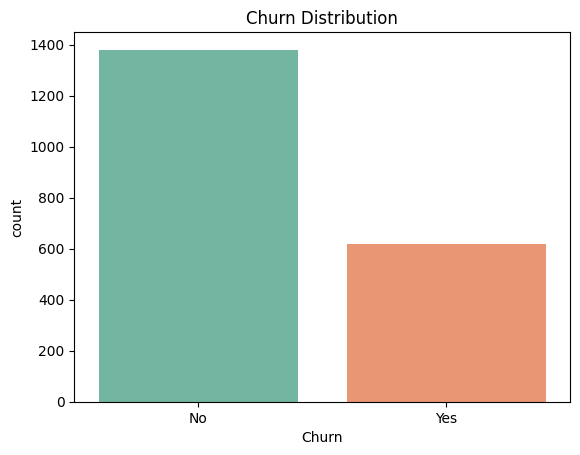

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Churn Distribution')
plt.show()

## 🔍 What this shows:
How many customers churned vs stayed.



### 🔹 Step 3: Categorical Features vs Churn

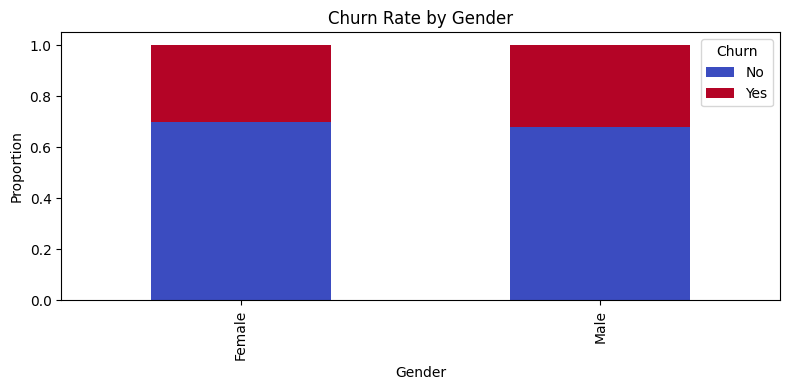

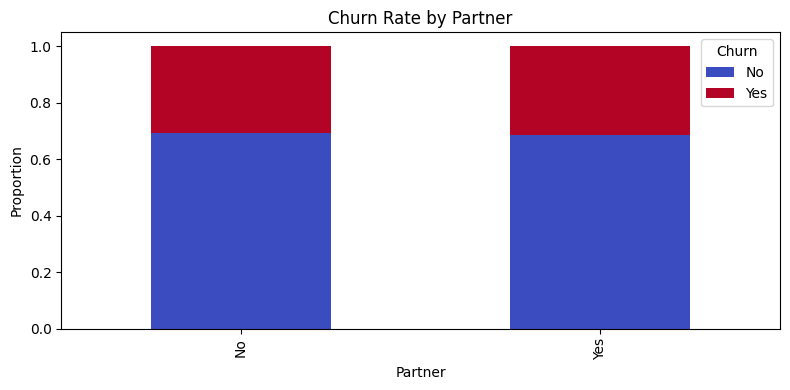

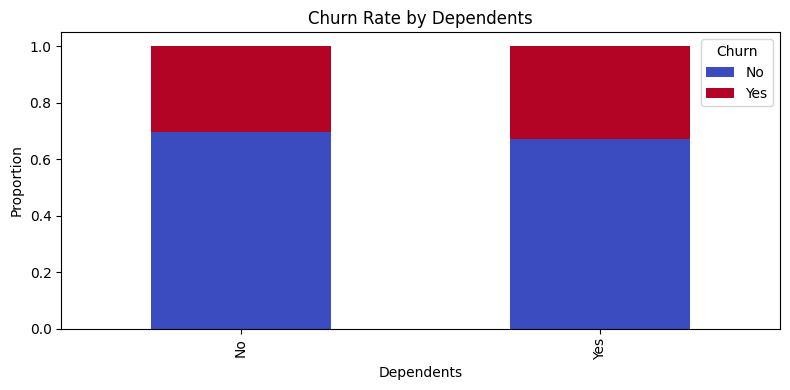

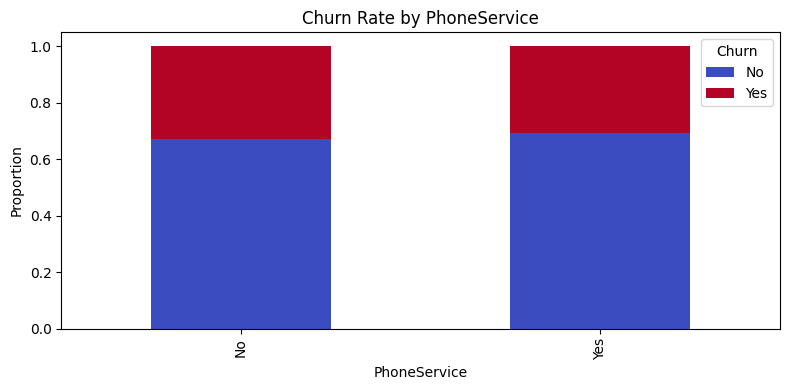

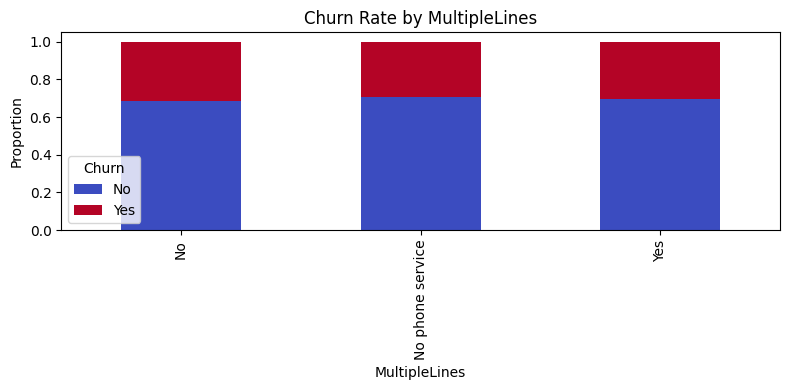

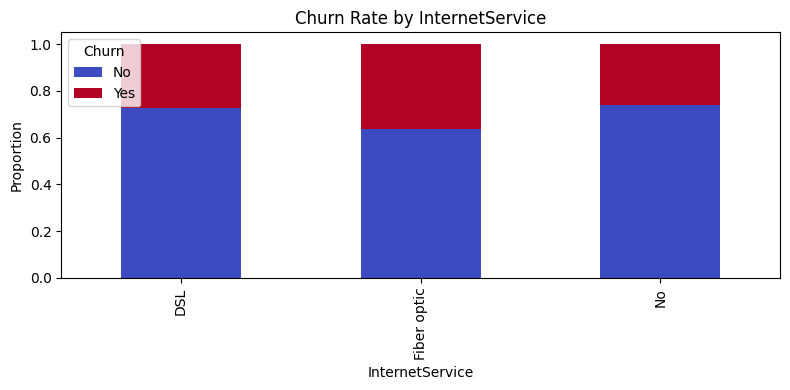

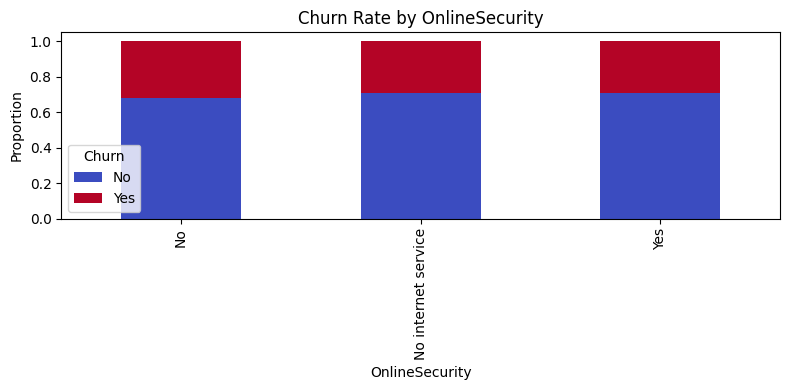

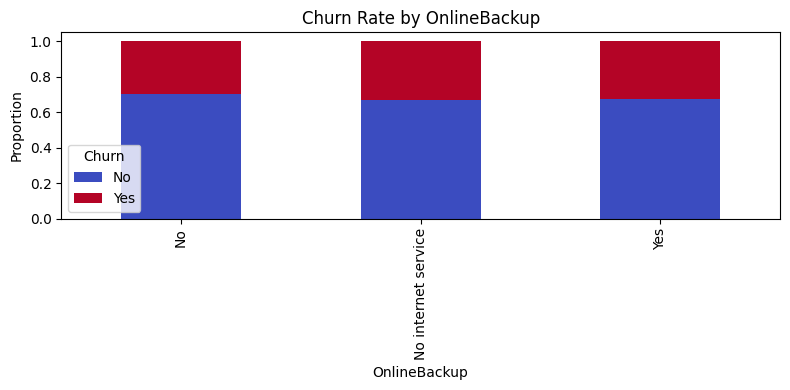

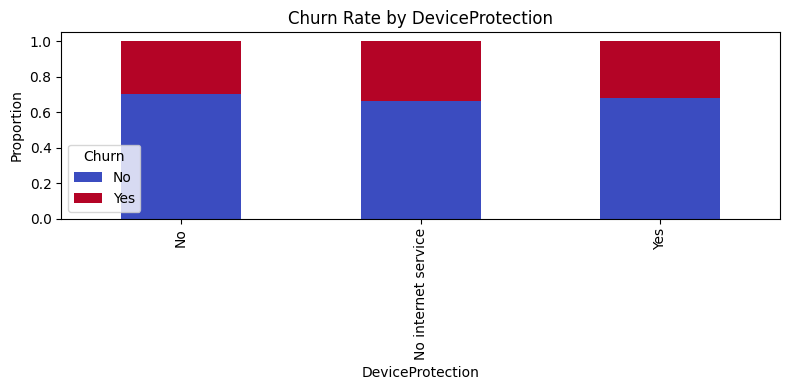

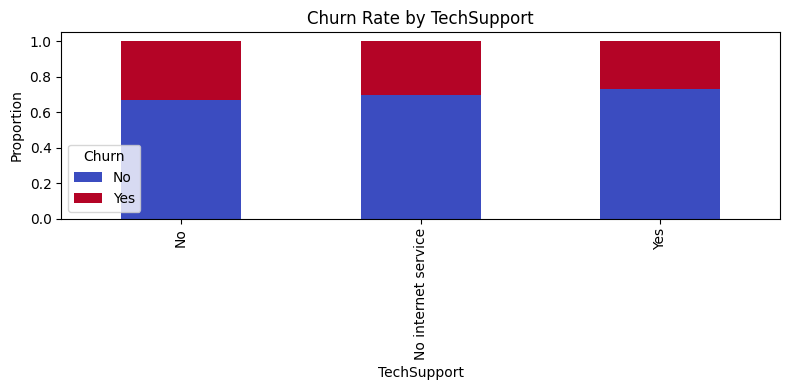

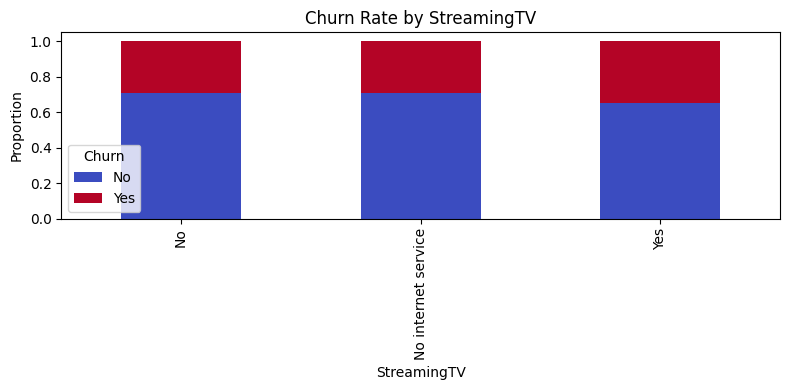

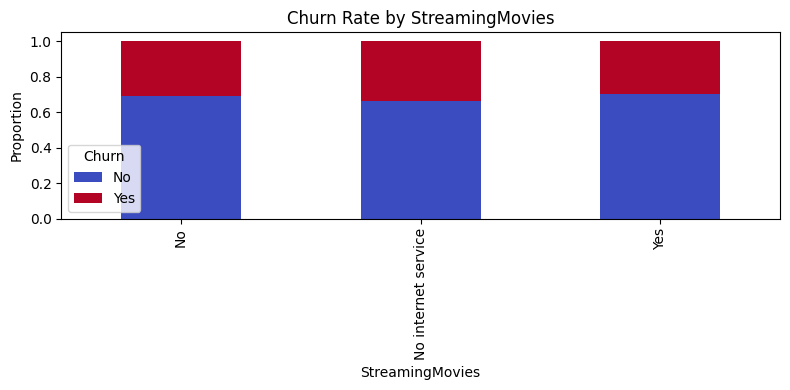

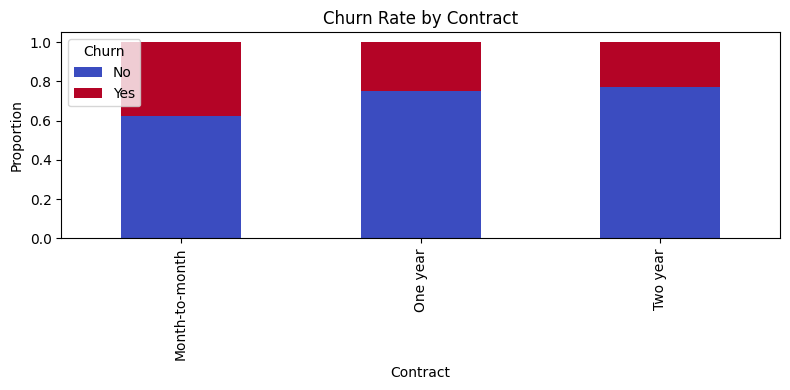

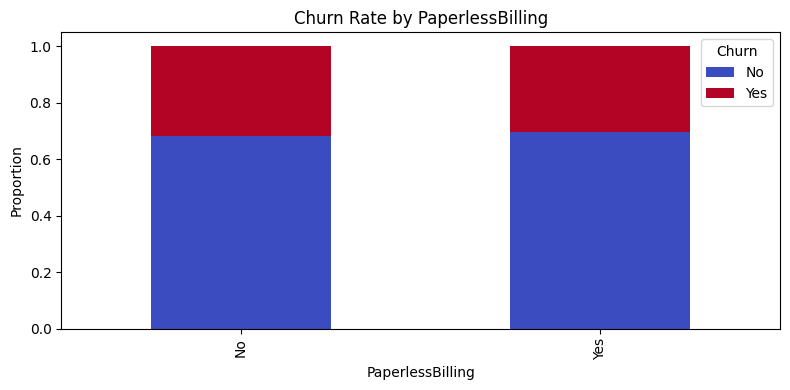

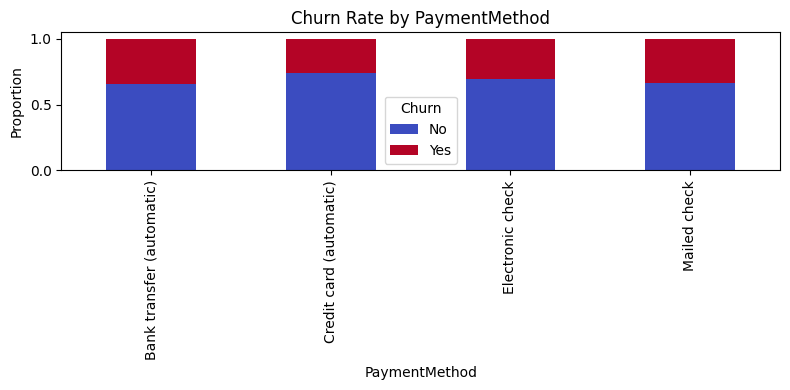

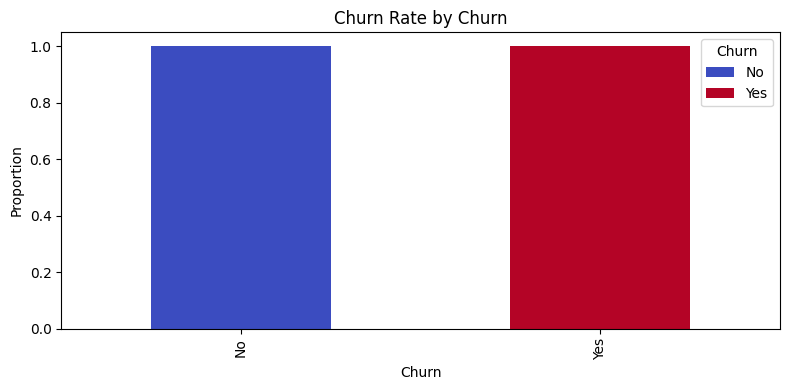

In [ ]:
# For each categorical column (except CustomerID), plot Churn distribution
for col in categorical_cols:
    if col != 'CustomerID':
        # Group by category and Churn, count occurrences
        churn_rate = df.groupby([col, 'Churn']).size().unstack(fill_value=0)

        # Normalize to get proportions
        churn_rate_norm = churn_rate.div(churn_rate.sum(axis=1), axis=0)

        # Plot stacked bar chart
        churn_rate_norm.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='coolwarm')
        plt.title(f'Churn Rate by {col}')
        plt.ylabel('Proportion')
        plt.xlabel(col)
        plt.legend(title='Churn')
        plt.tight_layout()
        plt.show()

🔍 What this shows:

Visual bar plots of churn percentage by category (e.g., Contract, Gender).

Helps identify patterns like:

Month-to-month customers churn more

No tech support → higher churn

🔍 Explanation


df.groupby([col, 'Churn']).size() counts customers in each group (e.g., "Yes" churn among "Male").

.unstack() turns the Churn values into separate columns.

.div(..., axis=0) normalizes counts into percentages per row.

plot(..., stacked=True) draws the stacked bar chart.

This gives you an easy-to-read visual of how churn varies across different categories like:

Contract type

Gender

Payment method

Internet service





###🔹 Step 4: Numerical Features vs Churn (Box Plots)
🔍 What this shows:

Compare distribution of features like Tenure, MonthlyCharges, TotalCharges for Churn = Yes/No

Helps identify:

Churned customers may have lower tenure

Higher MonthlyCharges may correlate with churn



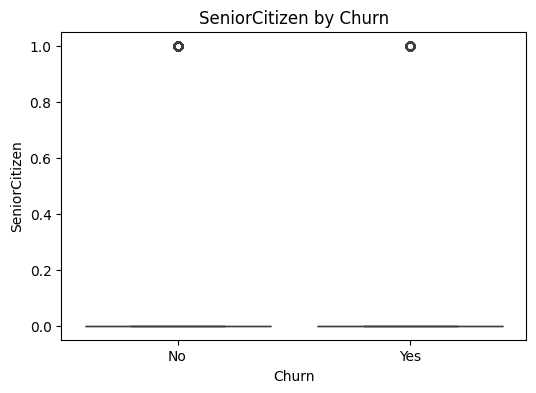

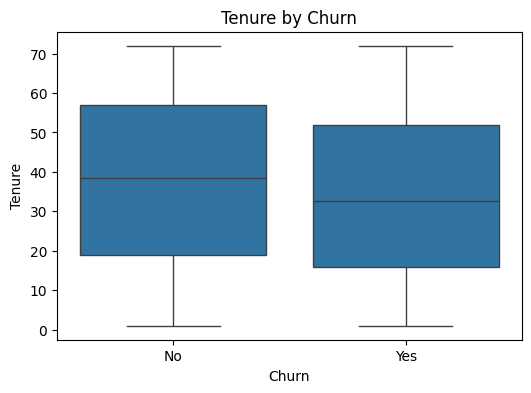

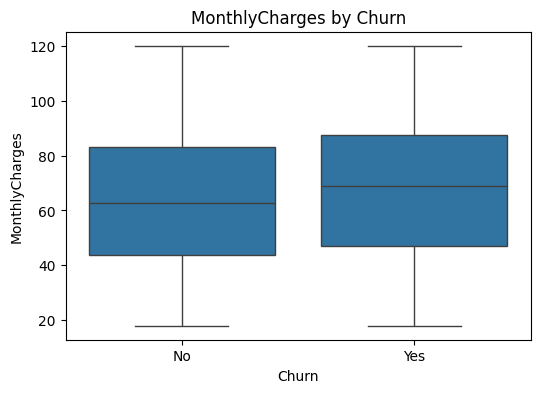

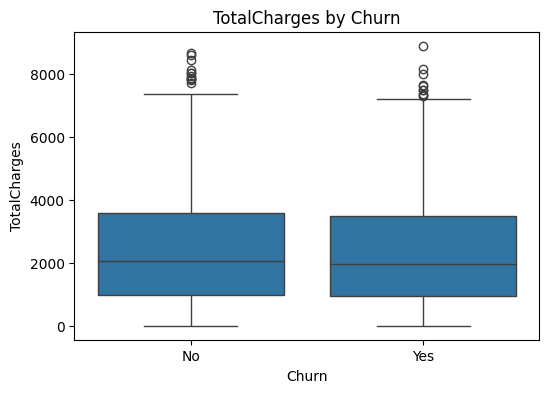

In [ ]:
# Boxplots of numerical features vs churn
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} by Churn')
    plt.show()

### 🔹 Step 5: Correlation Heatmap (Numerical Only)
We drop non-numeric columns like CustomerID.
🔍 What this shows:

How numeric columns relate to churn (and to each other)

Look at correlation with Churn (positive or negative)



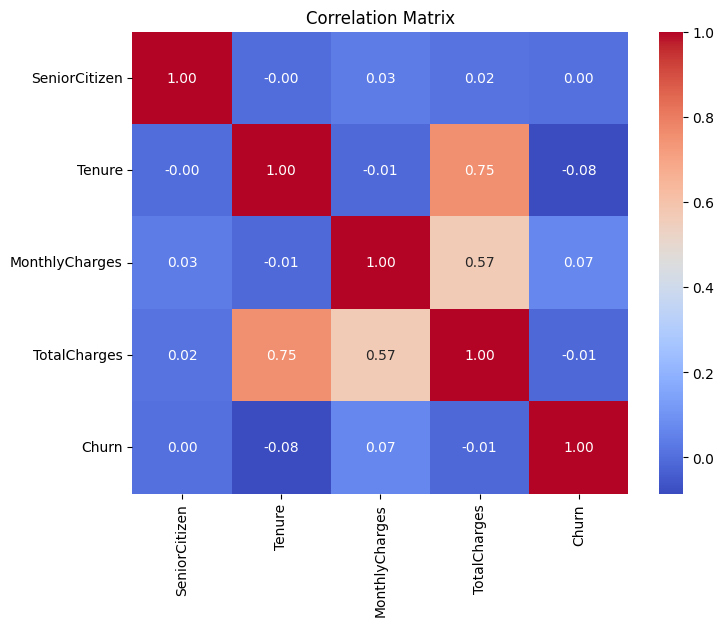

In [ ]:
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})  # Convert churn to 1/0

# Keep only numeric columns
df_numeric = df_corr.select_dtypes(include=['int64', 'float64'])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


### Summary

| Step   | Output                                           |
| ------ | ------------------------------------------------ |
| Step 1 | Lists of categorical/numerical columns           |
| Step 2 | Bar plot of churn distribution                   |
| Step 3 | Stacked bar plots: churn rate per category       |
| Step 4 | Boxplots: numerical distributions split by churn |
| Step 5 | Correlation matrix heatmap                       |
